In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
import numpy as np

In [2]:
data = pd.read_csv('../data/table.csv')
data.head()

,Tool,year_pub,num_citations,citation_per_year,category,package_manager,required_expertise,type_of_URL
0,iSeqQC,2020,0,0.000000,Data quality control,none,++,1
1,qsmooth2,2018,29,14.500000,Data quality control,Bioconductor,++,1
2,FastQC,2018,75,37.500000,Data quality control,Anaconda,++,1
3,QC3,2014,64,10.666667,Data quality control,Anaconda,++,1
4,kPAL,2014,18,3.000000,Data quality control,Anaconda,++,1


In [3]:
data['year_pub'].value_counts()

2014    40
2013    31
2015    30
2016    22
2012    22
2011    21
2019    17
2018    15
2010    14
2017    13
2020     5
2009     3
2008     2
Name: year_pub, dtype: int64

In [4]:
data['required_expertise'].value_counts()

+++     112
++      101
+        19
none      3
Name: required_expertise, dtype: int64

In [5]:
data['type_of_URL'].value_counts()

1    156
2     79
Name: type_of_URL, dtype: int64

In [6]:
data['package_manager'].value_counts()

none                      147
Anaconda                   56
Anaconda, Bioconductor     20
Bioconductor                4
PyPI                        2
Anaconda, CRAN              2
pip                         1
CRAN                        1
Bioconductor, CRAN          1
Docker Hub                  1
Name: package_manager, dtype: int64

In [7]:
idx_group = data.groupby('category')['Tool'].count().reset_index().sort_values('Tool', ascending=False)
idx_group

,category,Tool
12,Transcriptome quantification,30
4,Differential expression,24
9,Read alignment,22
8,RNA splicing,21
3,Detecting circRNA,19
5,Fusion detection,18
1,Cell deconvolution,16
2,Data quality control,16
11,Transcriptome assembly,16
14,Visualization tools,15


# Cumulative graph

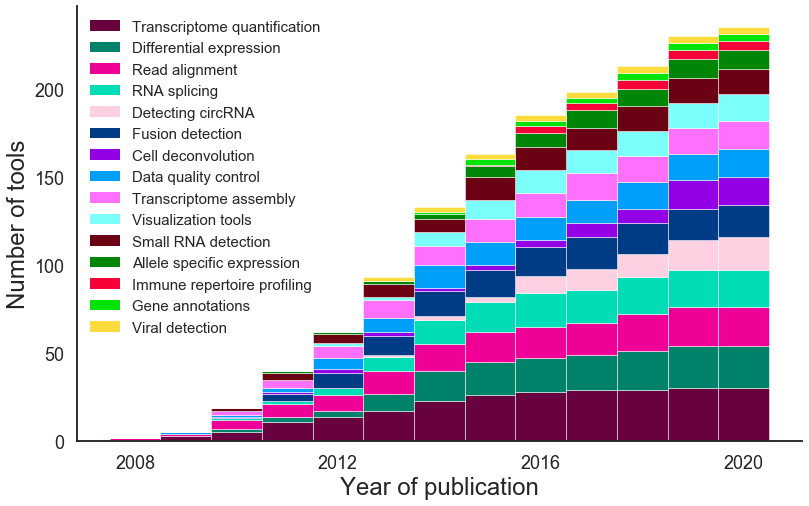

In [8]:
plt.figure(figsize=(13,8))

idx = range(min(data['year_pub']), max(data['year_pub'])+1)
by_year = data.groupby(['year_pub','category']).count()
by_year = by_year.xs('Tool', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
by_year = by_year.reindex(idx, method='ffill')
x = by_year.index

sns.set_style('white')
sns.set_context('talk')

E = by_year['Transcriptome quantification'].to_list()
F = by_year['Differential expression'].to_list()
B = by_year['Read alignment'].to_list()
G = by_year['RNA splicing'].to_list()
M = by_year['Detecting circRNA'].to_list()
L = by_year['Fusion detection'].to_list()
H = by_year['Cell deconvolution'].to_list()
A = by_year['Data quality control'].to_list()
D = by_year['Transcriptome assembly'].to_list()
N = by_year['Visualization tools'].to_list()
O = by_year['Small RNA detection'].to_list()
J = by_year['Allele specific expression'].to_list()
I = by_year['Immune repertoire profiling'].to_list()
C = by_year['Gene annotations'].to_list()
K = by_year['Viral detection'].to_list()

barWidth = 1
plt.bar(x, E, color='#68023F', edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, F, bottom=E, color='#008169', edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, B, bottom=[d+e for d,e in zip(E, F)], color='#EF0096', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, G, bottom=[d+e+b for d,e,b in zip(E,F,B)], color='#00DCB5', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, M, bottom=[d+e+b+g for d,e,b,g in zip(E,F,B,G)], color='#FFCFE2', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, L, bottom=[d+e+b+f+g for d,e,b,f,g in zip(E,F,B,G,M)], color='#003C86', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, H, bottom=[d+e+b+f+g+j for d,e,b,f,g,j in zip(E,F,B,G,M,L)], color='#9400E6', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, A, bottom=[d+e+b+f+g+j+a for d,e,b,f,g,j,a in zip(E,F,B,G,M,L,H)], color='#009FFA', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, D, bottom=[d+e+b+f+g+j+c+a for d,e,b,f,g,j,c,a in zip(E,F,B,G,M,L,H,A)], color='#FF71FD', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, N, bottom=[d+e+b+f+g+j+c+a+k for d,e,b,f,g,j,c,a,k in zip(E,F,B,G,M,L,H,A,D)], color='#7CFFFA', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, O, bottom=[d+e+b+f+g+j+c+a+k+l for d,e,b,f,g,j,c,a,k,l in zip(E,F,B,G,M,L,H,A,D,N)], color='#6A0213', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, J, bottom=[d+e+b+f+g+j+c+a+k+l+h for d,e,b,f,g,j,c,a,k,l,h in zip(E,F,B,G,M,L,H,A,D,N,O)], color='#008607', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, I, bottom=[d+e+b+f+g+j+c+a+k+l+h+x for d,e,b,f,g,j,c,a,k,l,h,x in zip(E,F,B,G,M,L,H,A,D,N,O,J)], color='#F60239', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, C, bottom=[d+e+b+f+g+j+c+a+k+l+h+x+y for d,e,b,f,g,j,c,a,k,l,h,x,y in zip(E,F,B,G,M,L,H,A,D,N,O,J,I)], color='#00E307', 
        edgecolor='white', width=barWidth, linewidth=.5)
plt.bar(x, K, bottom=[d+e+b+f+g+j+c+a+k+l+h+x+y+z for d,e,b,f,g,j,c,a,k,l,h,x,y,z in zip(E,F,B,G,M,L,H,A,D,N,O,J,I,C)], color='#FFDC3D', 
        edgecolor='white', width=barWidth, linewidth=.5)
k = plt.Rectangle((0,0),1,1,fc="#FFDC3D", edgecolor = 'none')
c = plt.Rectangle((0,0),1,1,fc="#00E307", edgecolor = 'none')
i = plt.Rectangle((0,0),1,1,fc='#F60239',  edgecolor = 'none')
j = plt.Rectangle((0,0),1,1,fc='#008607',  edgecolor = 'none')
o = plt.Rectangle((0,0),1,1,fc='#6A0213',  edgecolor = 'none')
n = plt.Rectangle((0,0),1,1,fc='#7CFFFA',  edgecolor = 'none')
d = plt.Rectangle((0,0),1,1,fc='#FF71FD',  edgecolor = 'none')
a = plt.Rectangle((0,0),1,1,fc='#009FFA',  edgecolor = 'none')
h = plt.Rectangle((0,0),1,1,fc='#9400E6',  edgecolor = 'none')
l = plt.Rectangle((0,0),1,1,fc='#003C86',  edgecolor = 'none')
m = plt.Rectangle((0,0),1,1,fc='#FFCFE2',  edgecolor = 'none')
g = plt.Rectangle((0,0),1,1,fc='#00DCB5',  edgecolor = 'none')
b = plt.Rectangle((0,0),1,1,fc='#EF0096',  edgecolor = 'none')
f = plt.Rectangle((0,0),1,1,fc='#008169',  edgecolor = 'none')
e = plt.Rectangle((0,0),1,1,fc='#68023F',  edgecolor = 'none')

legend=plt.legend([e,f,b,g,m,l,h,a,d,n,o,j,i,c,k], ['Transcriptome quantification','Differential expression',
                                                  'Read alignment','RNA splicing','Detecting circRNA',
                                                  'Fusion detection','Cell deconvolution',
                                                  'Data quality control','Transcriptome assembly',
                                                  'Visualization tools','Small RNA detection',
                                                  'Allele specific expression','Immune repertoire profiling',
                                                  'Gene annotations','Viral detection'],
               loc='best', prop={'size':15})
legend.draw_frame(False)

plt.ylabel("Number of tools", fontsize=24)
plt.xlabel("Year of publication", fontsize=24)

sns.despine()

plt.xticks(range(min(data['year_pub']), max(data['year_pub'])+2, 4), fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('../figures/figure5a.png', bbox_inches='tight')

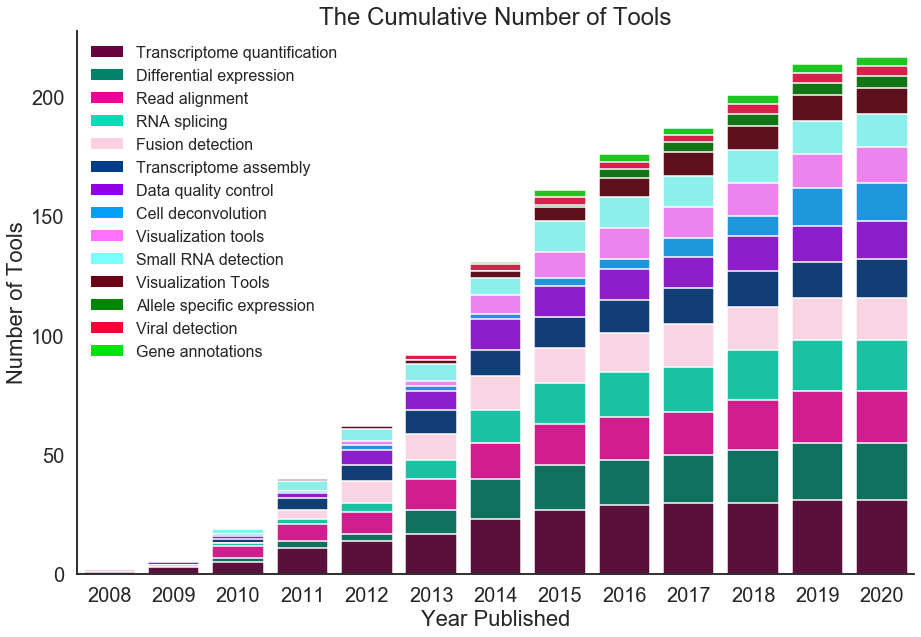

In [9]:
stacked_bar_data = pd.read_csv("../data/catyear.csv")
stacked_bar_data["total"] = stacked_bar_data.cumulation
stacked_bar_data["k"] = stacked_bar_data.cumulation-stacked_bar_data.C
stacked_bar_data["i"] = stacked_bar_data.k-stacked_bar_data.K
stacked_bar_data["j"] = stacked_bar_data.i-stacked_bar_data.I
stacked_bar_data["m"] = stacked_bar_data.j-stacked_bar_data.J
stacked_bar_data["n"] = stacked_bar_data.m-stacked_bar_data.M
stacked_bar_data["h"] = stacked_bar_data.n-stacked_bar_data.N
stacked_bar_data["a"] = stacked_bar_data.h-stacked_bar_data.H
stacked_bar_data["d"] = stacked_bar_data.a-stacked_bar_data.A
stacked_bar_data["l"] = stacked_bar_data.d-stacked_bar_data.D
stacked_bar_data["g"] = stacked_bar_data.l-stacked_bar_data.L
stacked_bar_data["b"] = stacked_bar_data.g-stacked_bar_data.G
stacked_bar_data["f"] = stacked_bar_data.b-stacked_bar_data.B
stacked_bar_data["e"] = stacked_bar_data.f-stacked_bar_data.F

sns.set_style("white")
sns.set_context({"figure.figsize": (15, 10)})

#Plot 
c = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.total, color="#00E307")
k = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.k, color="#F60239")
i = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.i, color="#008607")
j = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.j, color="#6A0213")
m = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.m, color="#7CFFFA")
n = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.n, color="#FF71FD")
h = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.h, color="#009FFA")
a = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.a, color="#9400E6")
d = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.d, color="#003C86")
l = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.l, color="#FFCFE2")
g = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.g, color="#00DCB5")
b = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.b, color="#EF0096")
f = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.f, color="#008169")
e = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.e, color="#68023F")

c = plt.Rectangle((0,0),1,1,fc="#00E307", edgecolor = 'none')
k = plt.Rectangle((0,0),1,1,fc='#F60239',  edgecolor = 'none')
i = plt.Rectangle((0,0),1,1,fc='#008607',  edgecolor = 'none')
j = plt.Rectangle((0,0),1,1,fc='#6A0213',  edgecolor = 'none')
m = plt.Rectangle((0,0),1,1,fc='#7CFFFA',  edgecolor = 'none')
n = plt.Rectangle((0,0),1,1,fc='#FF71FD',  edgecolor = 'none')
h = plt.Rectangle((0,0),1,1,fc='#009FFA',  edgecolor = 'none')
a = plt.Rectangle((0,0),1,1,fc='#9400E6',  edgecolor = 'none')
d = plt.Rectangle((0,0),1,1,fc='#003C86',  edgecolor = 'none')
l = plt.Rectangle((0,0),1,1,fc='#FFCFE2',  edgecolor = 'none')
g = plt.Rectangle((0,0),1,1,fc='#00DCB5',  edgecolor = 'none')
b = plt.Rectangle((0,0),1,1,fc='#EF0096',  edgecolor = 'none')
f = plt.Rectangle((0,0),1,1,fc='#008169',  edgecolor = 'none')
e = plt.Rectangle((0,0),1,1,fc='#68023F',  edgecolor = 'none')

legend=plt.legend([e,f,b,g,l,d,a,h,n,m,j,i,k,c], ['Transcriptome quantification','Differential expression',
                                                  'Read alignment','RNA splicing','Fusion detection',
                                                  'Transcriptome assembly','Data quality control',
                                                  'Cell deconvolution','Visualization tools','Small RNA detection',
                                                  'Visualization Tools','Allele specific expression','Viral detection',
                                                  'Gene annotations'],
               loc='best', prop={'size':16})
legend.draw_frame(False)
plt.ylabel("Number of Tools",fontsize = 22)
plt.xlabel("Year Published",fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("The Cumulative Number of Tools",fontsize=24)
sns.despine()

plt.savefig('../figures/figure5aa.png', bbox_inches='tight')

# Domain-based required expertise

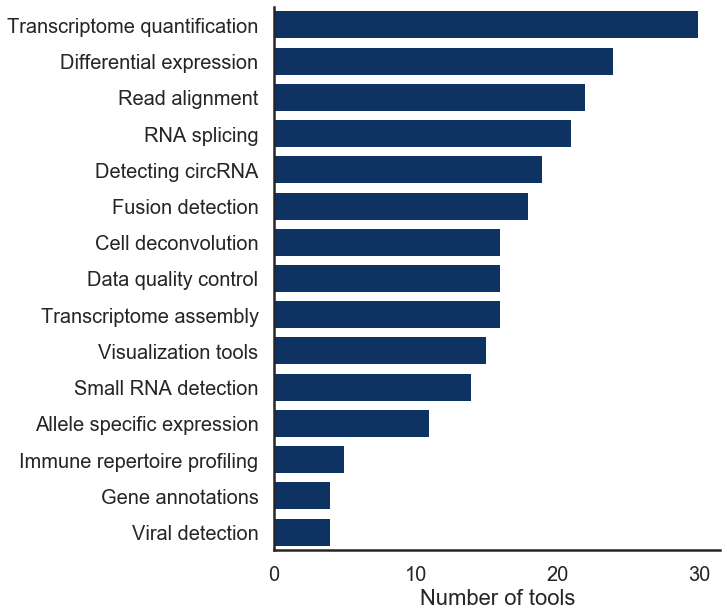

In [10]:
sns.set_style("white")
sns.set_context({"figure.figsize": (8, 10)})
sns.set_context("poster")

sns.barplot(y='category',x="Tool",data=pd.read_csv("../data/count_by_cat.csv"),color='#00306F')
plt.xlabel("Number of tools", fontsize=22)
plt.ylabel("", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
sns.despine()
plt.savefig('../figures/figure5b.png', bbox_inches='tight', pad_inches=.5)

//anaconda3/lib/python3.7/site-packages/IPython/core/inputtransformer2.py:481: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  warnings.warn("`make_tokens_by_line` received a list of lines which do not have lineending markers ('\\n', '\\r', '\\r\\n', '\\x0b', '\\x0c'), behavior will be unspecified")


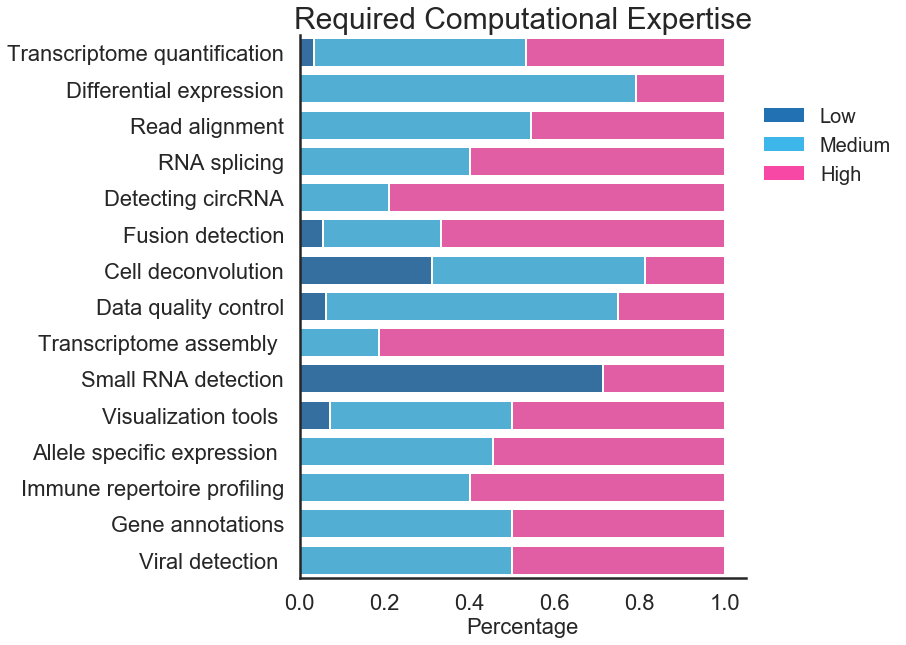

In [11]:
#colors = ['#F7941D', '#00b9f2', '#00a875', '#ecde38'] 
#sns.set_palette(sns.color_palette(colors)) 
stacked_bar_data = pd.read_csv("../data/expertise_percent.csv")

sns.set_style("white")
sns.set_context({"figure.figsize": (8, 10)})

#Plot 1 - background - "total" (top)
top_plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "#F748A5")

#Plot 2 - overlay - "medium" 
medium_plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.medium + stacked_bar_data.easy, 
                          color = "#3DB7E9")

#Plot3 - overlay - "bottom"
bottom_plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.easy, color = "#2271B2")


topbar = plt.Rectangle((0,0),1,1,fc="#F748A5", edgecolor = 'none')
mediumbar = plt.Rectangle((0,0),1,1,fc='#3DB7E9',  edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc="#2271B2", edgecolor = 'none')
l = plt.legend([bottombar, mediumbar, topbar], ['Low','Medium','High'],bbox_to_anchor=(1, .9),prop={'size':20})
l.draw_frame(False)
plt.title("Required Computational Expertise", fontsize = 30)

sns.despine()
bottom_plot.set_xlabel("Percentage")
bottom_plot.set_ylabel("")

#Set fonts to consistent size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] ):
    item.set_fontsize(22)
for items in (bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    items.set_fontsize(22)
    

plt.savefig('../figures/figure5c.png', bbox_inches='tight', pad_inches=.5)

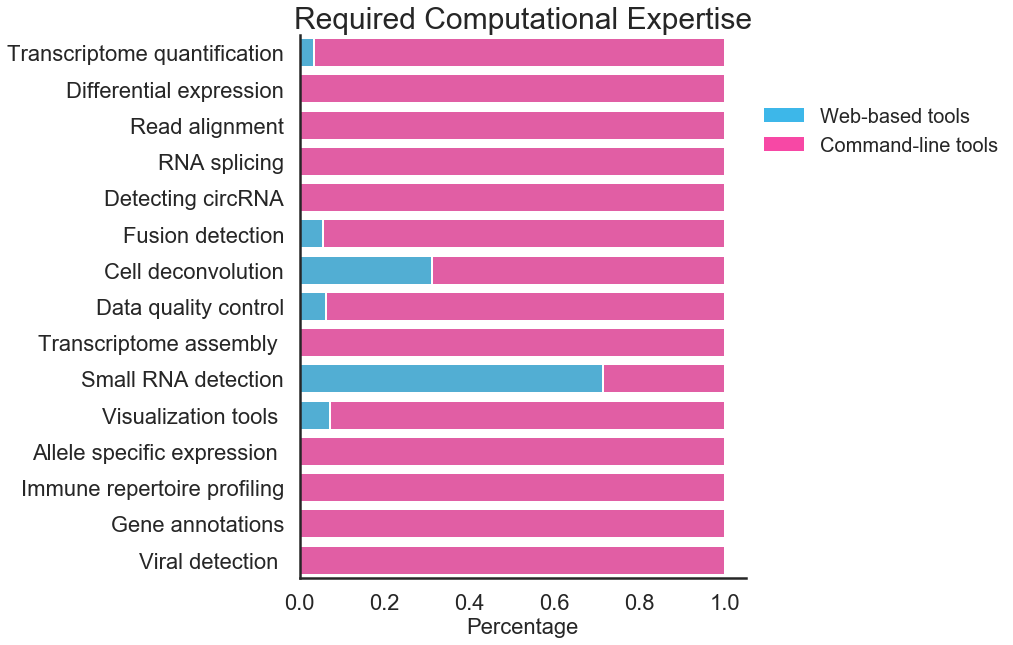

In [12]:
sns.set_style("white")
sns.set_context({"figure.figsize": (8, 10)})

#Plot 1 - background - "total" (top)
top = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "#F748A5")
#Plot3 - overlay - "bottom"
bottom = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.easy, color = "#3DB7E9")


topbar = plt.Rectangle((0,0),1,1,fc="#F748A5", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#3DB7E9',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Web-based tools','Command-line tools'],bbox_to_anchor=(1, .9),prop={'size':20})
l.draw_frame(False)
plt.title("Required Computational Expertise", fontsize = 30)

sns.despine()
plt.xlabel("Percentage", fontsize=22)
plt.ylabel("", fontsize=20)

#Set fonts to consistent size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] ):
    item.set_fontsize(22)
for items in (bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    items.set_fontsize(22)
plt.savefig('../figures/figure5cc.png', bbox_inches='tight', pad_inches=.5)

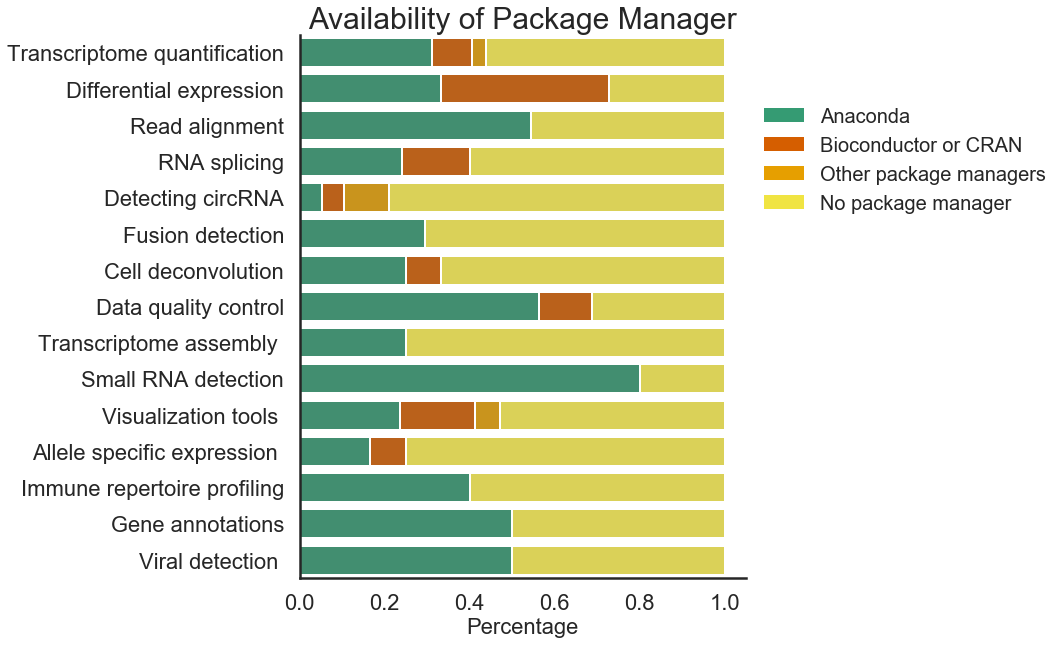

In [13]:
stacked_bar_data = pd.read_csv("../data/package_percent.csv")

sns.set_style("white")
sns.set_context({"figure.figsize": (8, 10)})

#Plot
total = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "#F0E442")
other = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total - stacked_bar_data.none, 
                   color = "#E69F00")
b_c = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.Anaconda + stacked_bar_data.Bioconductor + stacked_bar_data.CRAN, 
                           color = "#D55E00")
anaconda = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.Anaconda, color = "#359B73")

total = plt.Rectangle((0,0),1,1,fc="#F0E442", edgecolor = 'none')
other = plt.Rectangle((0,0),1,1,fc='#E69F00',  edgecolor = 'none')
b_c = plt.Rectangle((0,0),1,1,fc="#D55E00", edgecolor = 'none')
anaconda = plt.Rectangle((0,0),1,1,fc="#359B73", edgecolor = 'none')
legend = plt.legend([anaconda, b_c, other, total], ['Anaconda','Bioconductor or CRAN','Other package managers','No package manager'], 
                    bbox_to_anchor=(1, .9), prop={'size':20})
legend.draw_frame(False)
plt.title("Availability of Package Manager", fontsize = 30)

sns.despine()
plt.xlabel("Percentage",fontsize=22)
plt.ylabel("")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
    

plt.savefig('../figures/figure5d.png', bbox_inches='tight', pad_inches=.5)

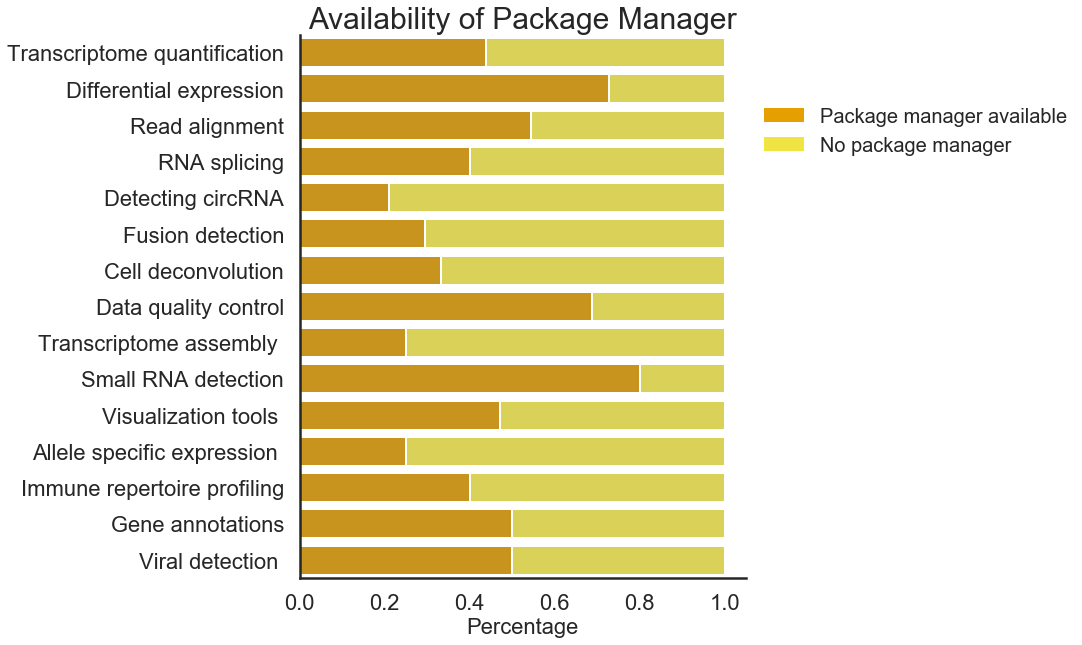

In [14]:
stacked_bar_data = pd.read_csv("../data/package_percent.csv")

sns.set_style("white")
sns.set_context({"figure.figsize": (8, 10)})

#Plot
total = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "#F0E442")
available = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total - stacked_bar_data.none, 
                   color = "#E69F00")

total = plt.Rectangle((0,0),1,1,fc="#F0E442", edgecolor = 'none')
available = plt.Rectangle((0,0),1,1,fc='#E69F00',  edgecolor = 'none')

legend = plt.legend([available, total], ['Package manager available','No package manager'], 
                    bbox_to_anchor=(1, .9), prop={'size':20})
legend.draw_frame(False)
plt.title("Availability of Package Manager", fontsize = 30)

sns.despine()
plt.xlabel("Percentage",fontsize=22)
plt.ylabel("")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
    

plt.savefig('../figures/figure5dd.png', bbox_inches='tight', pad_inches=.5)

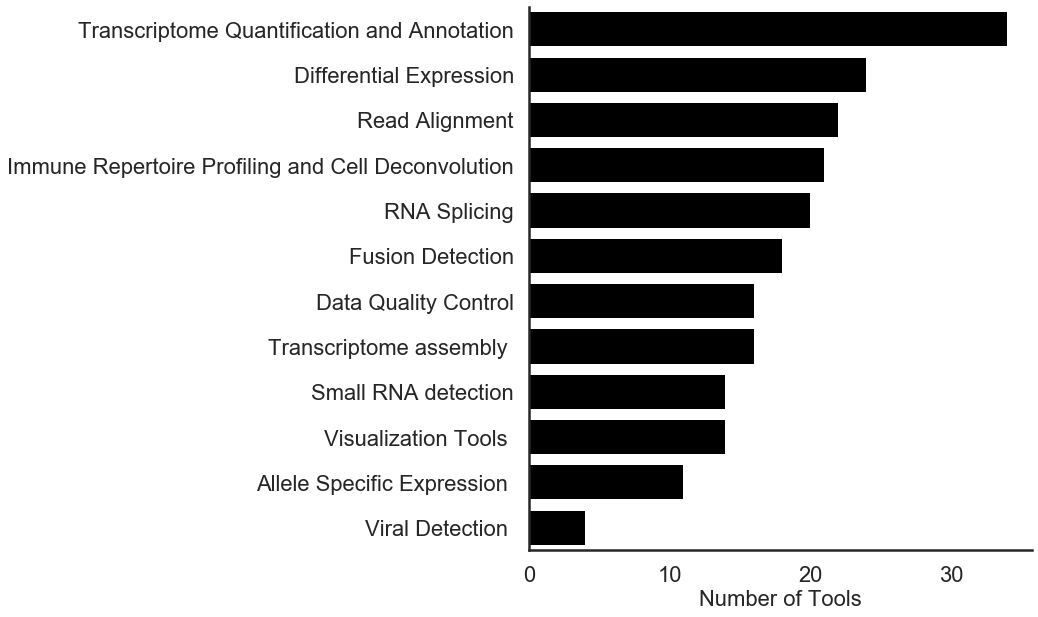

In [15]:
stacked_bar_data = pd.read_csv("../data/required_expertise.csv")
stacked_bar_data["total"] = stacked_bar_data.easy + stacked_bar_data.medium + stacked_bar_data.hard

sns.set_style("white")
sns.set_context({"figure.figsize": (9, 10)})

plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "black")

plt.xlabel("Number of Tools",fontsize=22)
plt.ylabel("")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#plt.title("Number of Tools in Each Category", fontsize=30)
sns.despine()
#plt.savefig('../figures/figure7b.png', bbox_inches='tight', pad_inches=.5)

# Pie chart

Text(0.5, 1.0, 'Type of URLs')

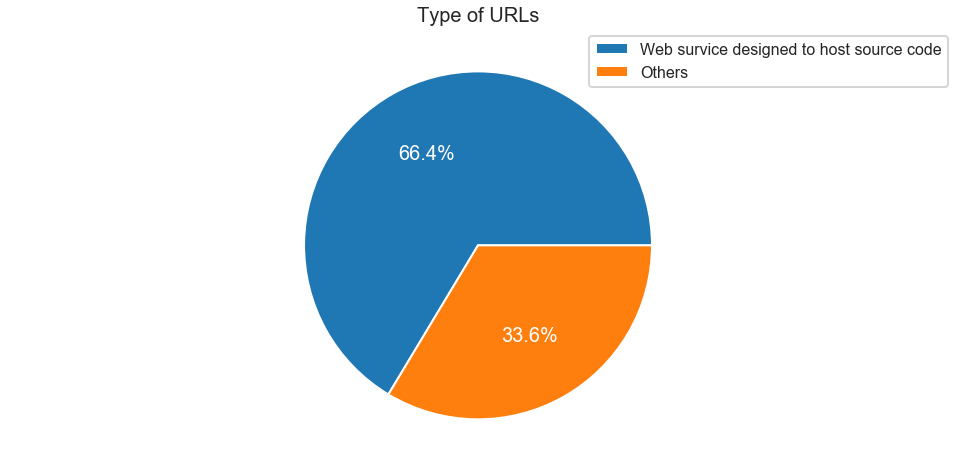

In [16]:
URL = pd.DataFrame({'ratio': [156, 79]}, index=['Web survice designed to host source code','Others'])
plot = URL.plot.pie(subplots=True, figsize=(8,8), autopct='%1.1f%%', textprops = {'color':"w"}, 
                              fontsize = 20)
plt.legend(loc='best', bbox_to_anchor=(0, .8, 1.6, .2), fontsize = 16)
plt.ylabel("", color = "black")
plt.title("Type of URLs", fontsize = 20)
#plt.savefig('../figures/figure7g.png',bbox_inches='tight')

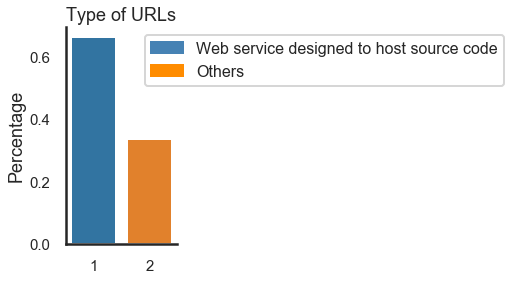

In [17]:
archival = pd.read_csv("../data/stability.csv")
sns.set_style("white")
sns.set_context({"figure.figsize": (2, 4)})

sns.barplot(x=archival.stability, y=archival.percent)

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='steelblue', label='Web service designed to host source code')
orange_patch = mpatches.Patch(color='darkorange', label='Others')

plt.legend(handles=[blue_patch, orange_patch],bbox_to_anchor=(0, .8, 4, .2),fontsize=16)


plt.xlabel("")
plt.ylabel("Percentage", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Type of URLs",fontsize=18)
sns.despine()
plt.savefig('../figures/figure5g.png',bbox_inches='tight')

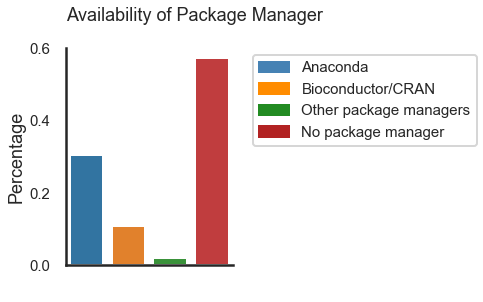

In [18]:
manager = pd.read_csv("../data/manager.csv")
sns.set_style("white")
sns.set_context({"figure.figsize": (3, 4)})

sns.barplot(x=manager.manager, y=manager.percent)
a = mpatches.Patch(color='steelblue', label='Anaconda')
b = mpatches.Patch(color='darkorange', label='Bioconductor/CRAN')
c = mpatches.Patch(color='forestgreen', label='Other package managers')
no = mpatches.Patch(color='firebrick', label='No package manager')
plt.legend(handles=[a, b, c, no],bbox_to_anchor=(0, .9, 2.5, .1),fontsize=15)

plt.xlabel("", fontsize=15)
plt.ylabel("Percentage", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Availability of Package Manager\n",fontsize=18,loc="left")
sns.despine()
plt.savefig('../figures/figure5f.png',bbox_inches='tight')

Text(0.5, 1.0, 'Availability of Package Manager Implementation')

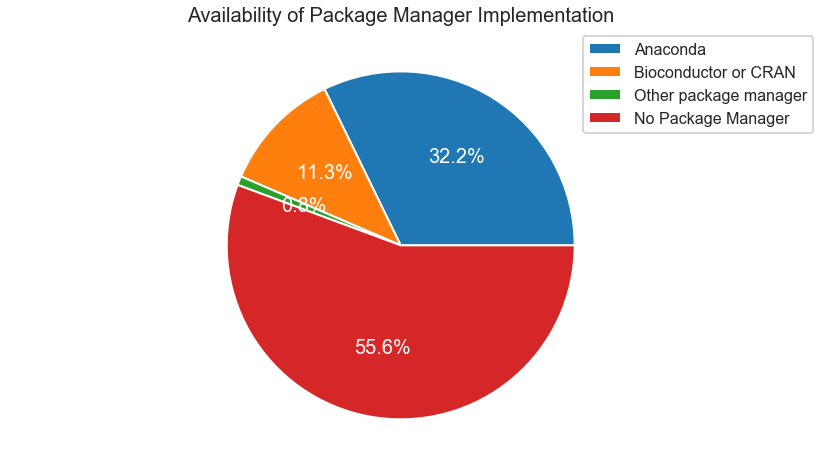

In [19]:
manager = pd.DataFrame({'Package Manager': [77,27,2,133]}, index=['Anaconda','Bioconductor or CRAN','Other package manager',
                                                                  'No Package Manager'])
plot = manager.plot.pie(subplots=True, figsize=(8,8), autopct='%1.1f%%', textprops = {'color':"w"}, 
                              fontsize = 20)
plt.legend(loc='best', bbox_to_anchor=(.9, 1),fontsize = 16)
plt.ylabel("", color = "black")
plt.title("Availability of Package Manager Implementation", fontsize = 20)
#plt.savefig('../figures/figure7f.png',bbox_inches='tight')

# Citations

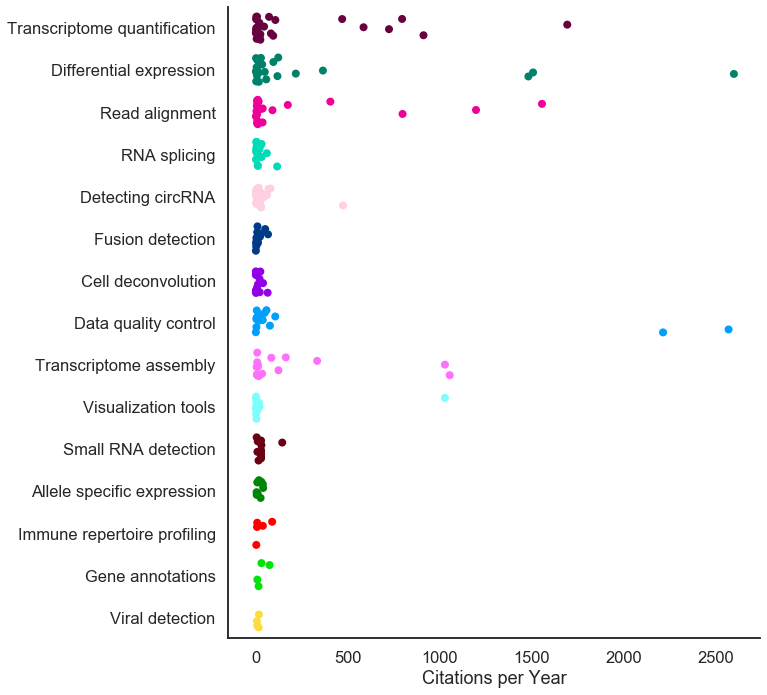

In [20]:
plt.figure(figsize=(11,10))

sns.set_style('white')
sns.set_context('talk')

color = ['#68023F','#008169','#EF0096','#00DCB5','#FFCFE2','#003C86','#9400E6','#009FFA','#FF71FD','#7CFFFA',
         '#6A0213','#008607','red',"#00E307",'#FFDC3D']
ax = sns.stripplot(data = data, y = 'category', x = 'citation_per_year', 
                   order=['Transcriptome quantification','Differential expression',
                          'Read alignment','RNA splicing','Detecting circRNA',
                          'Fusion detection','Cell deconvolution',
                          'Data quality control','Transcriptome assembly',
                          'Visualization tools','Small RNA detection',
                          'Allele specific expression','Immune repertoire profiling',
                          'Gene annotations','Viral detection'],
                   palette=color, size=8, jitter=.3)
#plt.xscale('log')
labels = ax.get_xticklabels()
#ax.set_xticklabels(labels, rotation=50, ha="right", fontsize=18)
ax.set(ylabel = '', xlabel = "Citations per Year")
plt.tight_layout()
sns.despine()

plt.savefig('../figures/figure5e.png', bbox_inches='tight', pad_inches=.5)

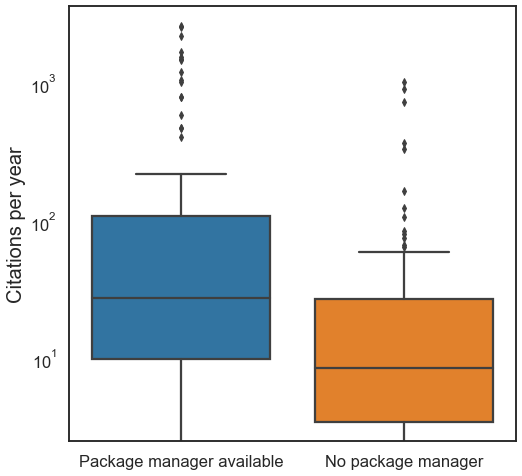

In [21]:
citation_merge = pd.read_csv('../data/table1.csv')
plt.figure(figsize=(8,8))
sns.set_style('white')
sns.set_context('talk')
sns.boxplot(x="package_manager", y="citation_per_year", data=citation_merge,
           order=["Package manager available", "No package manager"])
#p_value = stats.mannwhitneyu(available, no, alternative="greater")

plt.yscale('log')
plt.xlabel("")
plt.ylabel("Citations per year", fontsize=20)
plt.savefig('../figures/cit_d.png', bbox_inches='tight', pad_inches=.5)

In [22]:
import scipy.stats as stats
available = citation_merge.loc[citation_merge["package_manager"]=="Package manager available","citation_per_year"]
no = citation_merge.loc[citation_merge["package_manager"]=="No package manager","citation_per_year"]
mwu_results = stats.mannwhitneyu(available, no, alternative="greater")
print(mwu_results)

MannwhitneyuResult(statistic=9032.5, pvalue=1.848593736783185e-07)


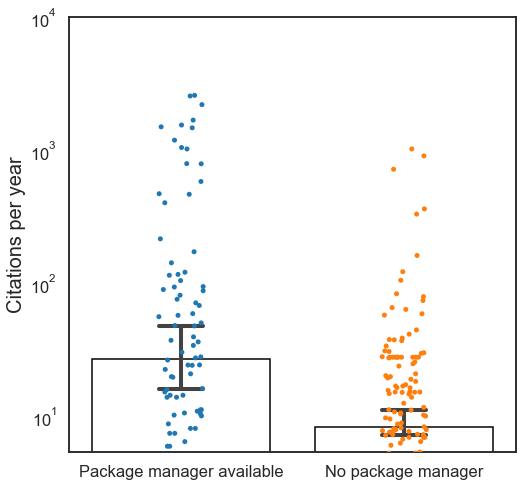

In [29]:
plt.figure(figsize=(8,8))
sns.set_style('white')
sns.set_context('talk')
sns.barplot(x="package_manager", y="citation_per_year", data=citation_merge, 
            estimator=np.median, capsize=.2, facecolor="white", edgecolor="black",
           order=["Package manager available", "No package manager"])
sns.stripplot(data=citation_merge, x="package_manager", y="citation_per_year",
             order=["Package manager available", "No package manager"])
plt.yscale('log')
plt.ylim(ymax=10000)
plt.xlabel("")
plt.ylabel("Citations per year", fontsize=20)
plt.savefig('../figures/cit_dd.png', bbox_inches='tight', pad_inches=.5)

Text(0, 0.5, 'Citations per year')

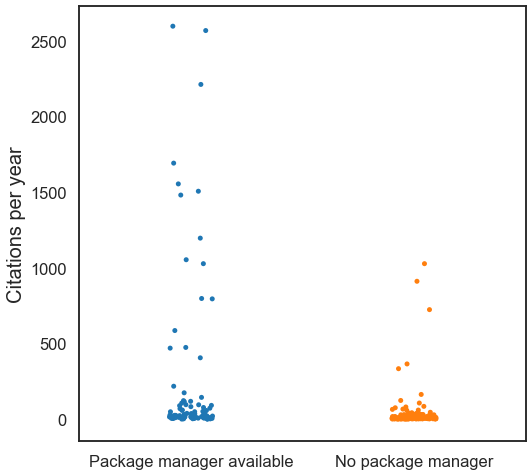

In [24]:
plt.figure(figsize=(8,8))
sns.set_style('white')
sns.set_context('talk')
sns.stripplot(data=citation_merge, x="package_manager", y="citation_per_year",
             order=["Package manager available", "No package manager"])
plt.xlabel("")
plt.ylabel("Citations per year", fontsize=20)

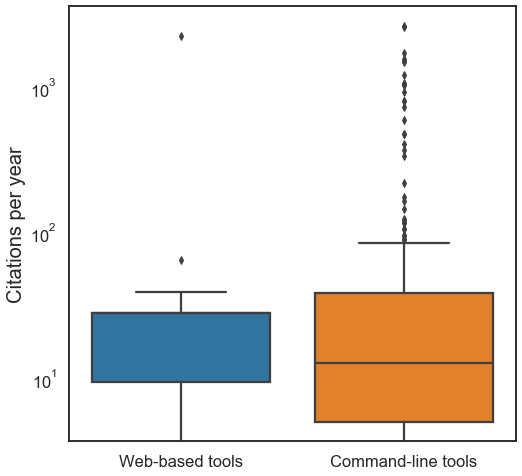

In [25]:
plt.figure(figsize=(8,8))
sns.set_style('white')
sns.set_context('talk')
sns.boxplot(x="required_expertise", y="citation_per_year", data=citation_merge,
           order=["Web-based tools", "Command-line tools"])
plt.yscale('log')
plt.xlabel("")
plt.ylabel("Citations per year", fontsize=20)
plt.savefig('../figures/cit_c.png', bbox_inches='tight', pad_inches=.5)

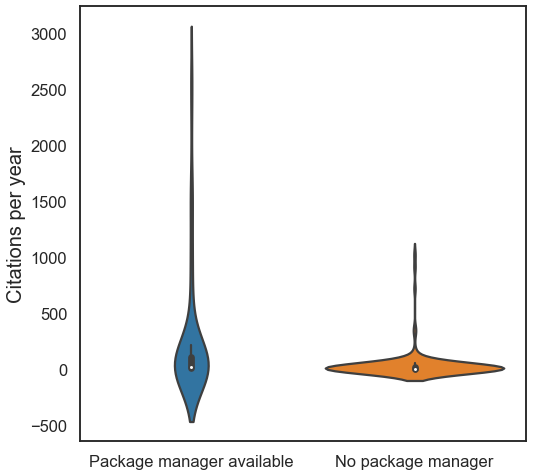

In [26]:
plt.figure(figsize=(8,8))
sns.set_style('white')
sns.set_context('talk')
sns.violinplot(x="package_manager", y="citation_per_year", data=citation_merge,
           order=["Package manager available", "No package manager"])
plt.xlabel("")
plt.ylabel("Citations per year", fontsize=20)
plt.savefig('../figures/cit_dv.png', bbox_inches='tight', pad_inches=.5)

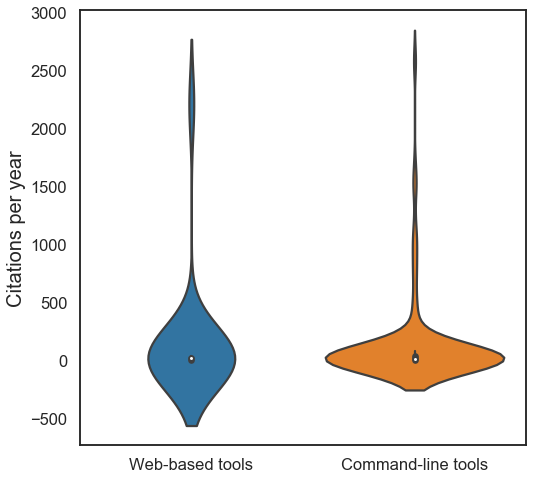

In [27]:
plt.figure(figsize=(8,8))
sns.set_style('white')
sns.set_context('talk')
sns.violinplot(x="required_expertise", y="citation_per_year", data=citation_merge,
           order=["Web-based tools", "Command-line tools"])
plt.xlabel("")
plt.ylabel("Citations per year", fontsize=20)
plt.savefig('../figures/cit_cv.png', bbox_inches='tight', pad_inches=.5)